## Import Dependancies

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from folium.plugins import HeatMap

In [8]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (6)\\Air_Quality.csv")

In [6]:
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1836 non-null   int64  
 1   country        1836 non-null   object 
 2   state          1836 non-null   object 
 3   city           1836 non-null   object 
 4   station        1836 non-null   object 
 5   pollutant_id   1836 non-null   object 
 6   last_update    1836 non-null   object 
 7   pollutant_min  1738 non-null   float64
 8   pollutant_max  1738 non-null   float64
 9   pollutant_avg  1738 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 143.6+ KB


In [15]:
df.isnull().sum()

id                0
country           0
state             0
city              0
station           0
pollutant_id      0
last_update       0
pollutant_min    98
pollutant_max    98
pollutant_avg    98
dtype: int64

In [16]:
df.isnull().mean().round(4) * 100

id               0.00
country          0.00
state            0.00
city             0.00
station          0.00
pollutant_id     0.00
last_update      0.00
pollutant_min    5.34
pollutant_max    5.34
pollutant_avg    5.34
dtype: float64

## Top ten cities with highest pollution

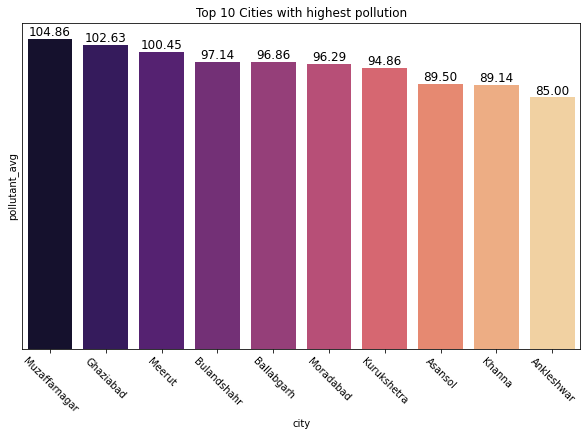

In [57]:
plt.figure(figsize=(10, 6))


highest_city=df.groupby(['city'])['pollutant_avg'].mean().nlargest(10).reset_index()

ax=sns.barplot(data=highest_city,x='city',y='pollutant_avg',palette='magma',linewidth=10)
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 Cities with highest pollution')
plt.show()


## Top ten cities with lowest pollution

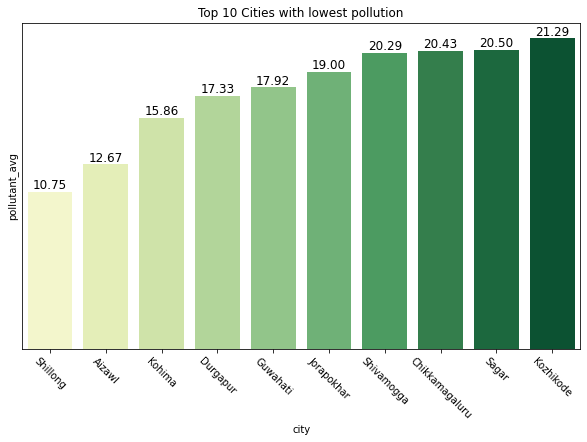

In [56]:
plt.figure(figsize=(10, 6))
palette = sns.light_palette("seagreen", as_cmap=True)
lowest_city=df.groupby(['city'])['pollutant_avg'].mean().nsmallest(10).reset_index()
ax=sns.barplot(data=lowest_city,x='city',y='pollutant_avg',palette='YlGn')
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 Cities with lowest pollution')
plt.show()

In [27]:
grouped_city = df.groupby(['city'])['pollutant_avg'].mean().reset_index()

In [28]:
grouped_city

,city,pollutant_avg
0,Agartala,32.000000
1,Agra,72.058824
2,Ahmedabad,56.914286
3,Aizawl,12.666667
4,Ajmer,49.285714
...,...,...
137,Vijayapura,26.428571
138,Visakhapatnam,76.428571
139,Vrindavan,76.714286
140,Yadgir,27.571429


## View on map using Latitude and Longitude

In [30]:
geolocator = Nominatim(timeout=1, user_agent = "myGeolocator")
grouped_city = df.groupby(['city'])['pollutant_avg'].mean().reset_index()
def geocode_my_address(addr):

    try:
        x = geolocator.geocode(addr)
        lon_lat = x.longitude, x.latitude
        return lon_lat
    except:
        lon_lat = None, None
        return lon_lat

grouped_city['lon'], grouped_city['lat'] = zip(*grouped_city['city'].apply(lambda x: geocode_my_address(x)))

In [39]:
city_map = folium.Map(location=[19.667417,76.827826], tiles = "Stamen Toner",
                    
                      zoom_start = 5)

data_heatmap = grouped_city[['lat','lon']]
data_heatmap = grouped_city.dropna(axis=0, subset=['lat','lon'])
data_heatmap = [[row['lat'],row['lon']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=15).add_to(city_map)

city_map

## AQI Highest in Delhi followed by Uttar pradesh & Haryana

## Top 10 States with highest pollution

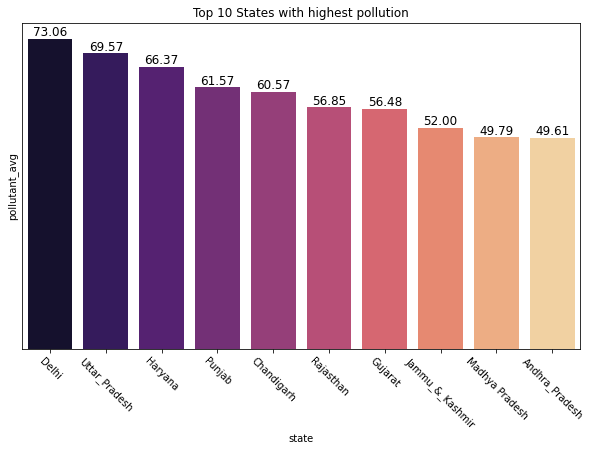

In [54]:
plt.figure(figsize=(10, 6))


highest_states=df.groupby(['state'])['pollutant_avg'].mean().nlargest(10).reset_index()

ax=sns.barplot(data=highest_states,x='state',y='pollutant_avg',palette='magma',linewidth=10)
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 States with highest pollution')
plt.show()

## Top 10 States with lowest pollution

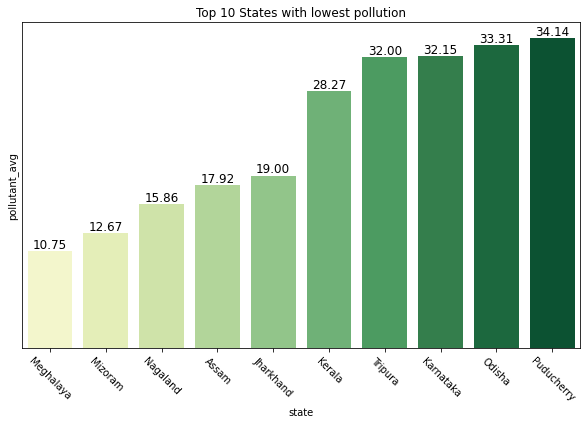

In [55]:
plt.figure(figsize=(10, 6))

lowest_states=df.groupby(['state'])['pollutant_avg'].mean().nsmallest(10).reset_index()
ax=sns.barplot(data=lowest_states,x='state',y='pollutant_avg',palette='YlGn')
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 States with lowest pollution')
plt.show()